## Setup

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


Import Libraries

In [4]:
import pandas as pd
from IPython.display import display #formatação bonita
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

#### Data paths

In [5]:
path= r"G:\Meu Drive\Meu projeto\csv_analise\top\aversivo\Fidel_d31_teste_3Dsnake_eletro_1DLC_resnet50_after_surgery_networkNov18shuffle1_300000.csv"
df = pd.read_csv(path)

In [6]:
video_path = r"G:\Meu Drive\Meu projeto\csv_analise\top\aversivo\Fidel_d31_teste_3Dsnake_eletro_1.mp4"

In [7]:
display(df.head(5)) #mostra as 5 primeiras linhas do dataframe

,scorer,DLC_resnet50_after_surgery_networkNov18shuffle1_300000,DLC_resnet50_after_surgery_networkNov18shuffle1_300000.1,DLC_resnet50_after_surgery_networkNov18shuffle1_300000.2,DLC_resnet50_after_surgery_networkNov18shuffle1_300000.3,DLC_resnet50_after_surgery_networkNov18shuffle1_300000.4,DLC_resnet50_after_surgery_networkNov18shuffle1_300000.5,DLC_resnet50_after_surgery_networkNov18shuffle1_300000.6,DLC_resnet50_after_surgery_networkNov18shuffle1_300000.7,DLC_resnet50_after_surgery_networkNov18shuffle1_300000.8,DLC_resnet50_after_surgery_networkNov18shuffle1_300000.9,DLC_resnet50_after_surgery_networkNov18shuffle1_300000.10,DLC_resnet50_after_surgery_networkNov18shuffle1_300000.11,DLC_resnet50_after_surgery_networkNov18shuffle1_300000.12,DLC_resnet50_after_surgery_networkNov18shuffle1_300000.13,DLC_resnet50_after_surgery_networkNov18shuffle1_300000.14
0,bodyparts,nose,nose,nose,head,head,head,body,body,body,left_window,left_window,left_window,right_window,right_window,right_window
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,0,385.508056640625,241.34449768066406,0.9976444840431213,407.58355712890625,197.3111114501953,0.9995249509811401,458.8364562988281,165.4302520751953,0.9935041069984436,87.31159210205078,382.2071228027344,0.9032818675041199,90.32450866699219,154.5525665283203,0.9977830052375793
3,1,385.07281494140625,241.40945434570312,0.9972105622291565,407.3654479980469,196.60206604003906,0.9996077418327332,458.15911865234375,164.8238067626953,0.9899718761444092,87.22994232177734,382.4720153808594,0.918679416179657,90.40513610839844,154.73312377929688,0.9975786805152893
4,2,385.11029052734375,241.4324493408203,0.9970822930335999,407.0871276855469,196.31199645996094,0.9996529817581177,458.1355285644531,164.6590118408203,0.9898372292518616,87.13552856445312,382.2604064941406,0.911474883556366,90.34809112548828,154.83865356445312,0.9974672794342041


In [8]:
df_segmented = pd.read_csv(path, header=[1, 2]) #Indica que as linhas 2 e 3 do arquivo (índices 1 e 2) são usadas como cabeçalhos

Check data frame

In [9]:
display(df_segmented.head())

bodyparts        nose                               head              \
     coords           x           y likelihood           x           y   
0         0  385.508057  241.344498   0.997644  407.583557  197.311111   
1         1  385.072815  241.409454   0.997211  407.365448  196.602066   
2         2  385.110291  241.432449   0.997082  407.087128  196.311996   
3         3  385.079010  241.088379   0.997477  407.456848  196.358612   
4         4  385.058289  240.826782   0.997581  407.541840  196.461212   

                    body                        left_window              \
  likelihood           x           y likelihood           x           y   
0   0.999525  458.836456  165.430252   0.993504   87.311592  382.207123   
1   0.999608  458.159119  164.823807   0.989972   87.229942  382.472015   
2   0.999653  458.135529  164.659012   0.989837   87.135529  382.260406   
3   0.999622  458.928650  165.317093   0.990766   87.136475  382.360596   
4   0.999633  458.211029  164.760132   0.988425   87.158607  382.392242   

             right_window                         
  likelihood            x           y likelihood  
0   0.903282    90.324509  154.552567   0.997783  
1   0.918679    90.405136  154.733124   0.997579  
2   0.911475    90.348091  154.838654   0.997467  
3   0.913835    90.397545  154.854492   0.997471  
4   0.917804    90.484932  154.668106   0.997831

#### Select box area

In [10]:
import cv2
import matplotlib.pyplot as plt
import os

def draw_box_on_frame(video_path, x1, x2, y1, y2, output_title="Frame com área de crop"):
    """
    Lê o primeiro frame de um vídeo, desenha um retângulo na área especificada e exibe com Matplotlib.

    Args:
        video_path (str): Caminho para o vídeo.
        x1, x2 (int): Coordenadas x inicial e final do retângulo.
        y1, y2 (int): Coordenadas y inicial e final do retângulo.
        output_title (str): Título da imagem exibida (padrão: "Frame com área de crop").

    Returns:
        None: Exibe a imagem com o retângulo usando Matplotlib.
    """
    # Verificar se o arquivo existe
    if not os.path.exists(video_path):
        print(f"Erro: O arquivo '{video_path}' não existe. Verifique o caminho.")
        return

    # Verificar permissões de leitura
    try:
        with open(video_path, 'rb') as f:
            pass
    except PermissionError:
        print(f"Erro: Sem permissão para acessar o arquivo '{video_path}'.")
        return
    except Exception as e:
        print(f"Erro ao acessar o arquivo '{video_path}': {str(e)}")
        return

    # Abrir o vídeo
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Erro: Não foi possível abrir o vídeo '{video_path}'. Verifique se o arquivo é válido ou está corrompido.")
        return

    # Ler o primeiro frame
    ret, frame = cap.read()
    if not ret or frame is None:
        print(f"Erro: Não foi possível ler o frame do vídeo. O vídeo pode estar corrompido ou vazio.")
        cap.release()
        return

    # Liberar o vídeo
    cap.release()

    # Desenhar o retângulo do crop na imagem
    frame_with_rect = frame.copy()
    cv2.rectangle(frame_with_rect, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Converter BGR para RGB
    frame_with_rect_rgb = cv2.cvtColor(frame_with_rect, cv2.COLOR_BGR2RGB)

    # Plotar a imagem com o retângulo
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_with_rect_rgb)
    plt.title(output_title)
    plt.axis('off')  # Remove os eixos
    plt.show()

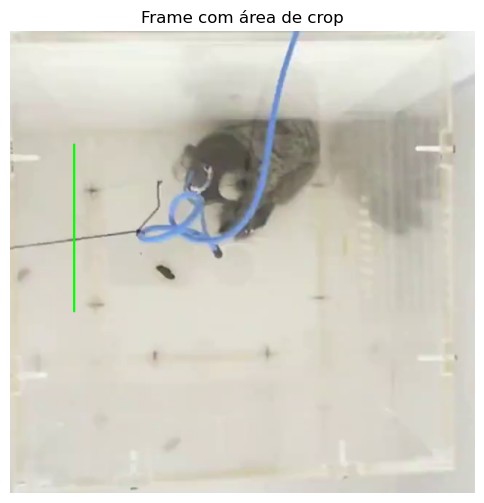

In [11]:
if __name__ == "__main__":
    x1 = 87
    y1 = 382
    x2 = 87
    y2 = 154
    draw_box_on_frame(video_path, x1, x2, y1, y2)

#### Head direction

In [12]:
# Extrair coordenadas
nose_x = df_segmented[('nose', 'x')].values
nose_y = df_segmented[('nose', 'y')].values
head_x = df_segmented[('head', 'x')].values
head_y = df_segmented[('head', 'y')].values

# Calcular o vetor direção
direction_x = nose_x - head_x
direction_y = nose_y - head_y


In [13]:
# Normalizar o vetor para ter comprimento 1
norm = np.sqrt(direction_x**2 + direction_y**2)
direction_x_norm = direction_x / norm
direction_y_norm = direction_y / norm

# Calcular o ângulo de direção em graus (0-360)
angles_rad = np.arctan2(direction_y_norm, direction_x_norm)
angles_deg = np.degrees(angles_rad) % 360


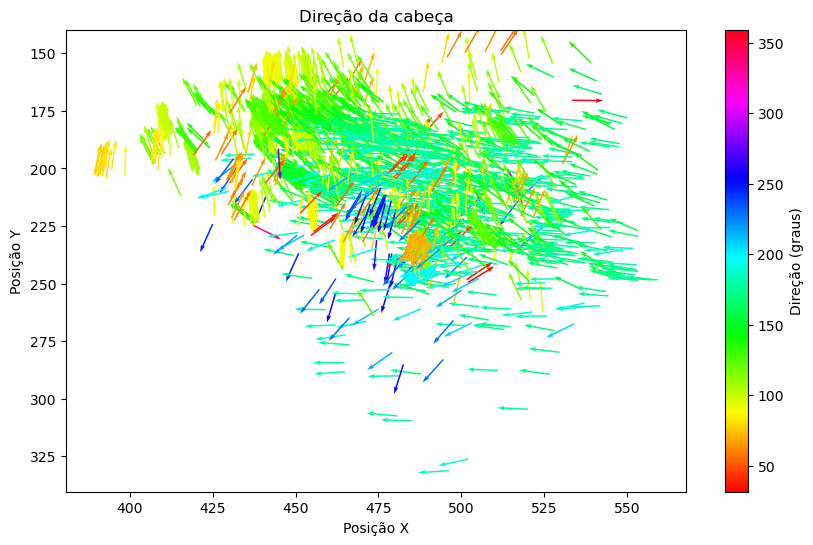

In [14]:
plt.figure(figsize=(10, 6))
sample_rate = 10  # Mostra 1 em cada 10 frames
plt.quiver(head_x[::sample_rate], head_y[::sample_rate],
           direction_x_norm[::sample_rate], direction_y_norm[::sample_rate],
           angles_deg[::sample_rate], scale=20, cmap='hsv')
plt.colorbar(label='Direção (graus)')
plt.title('Direção da cabeça')
plt.xlabel('Posição X')
plt.ylabel('Posição Y')
plt.gca().invert_yaxis()
plt.show()

#### Head direction output in video

In [15]:
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print    ("Erro ao carregar o vídeo. Verifique o caminho do arquivo.")
    exit()

In [16]:
# Get video information
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [17]:
# Definir o codec e criar o objeto VideoWriter para salvar o vídeo
output_path = "output_video_with_T.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec para MP4
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

In [18]:
frame_idx = 0
while cap.isOpened() and frame_idx < len(nose_x):
    ret, frame = cap.read()
    if not ret:
        break

    # Desenhar as linhas formando o "T" diretamente no frame
    # Linha entre as orelhas (base do T) - Vermelho (BGR: 0, 0, 255)
    cv2.line(frame,
             (int(earL_x[frame_idx]), int(earL_y[frame_idx])),
             (int(earR_x[frame_idx]), int(earR_y[frame_idx])),
             (0, 0, 255), 2)

    # Linha do ponto médio das orelhas até o nariz (haste do T) - Verde (BGR: 0, 255, 0)
    mid_ear_x = (earL_x[frame_idx] + earR_x[frame_idx]) / 2
    mid_ear_y = (earL_y[frame_idx] + earR_y[frame_idx]) / 2
    cv2.line(frame,
             (int(mid_ear_x), int(mid_ear_y)),
             (int(nose_x[frame_idx]), int(nose_y[frame_idx])),
             (0, 255, 0), 2)

    # Adicionar pontos para visualização
    cv2.circle(frame, (int(earL_x[frame_idx]), int(earL_y[frame_idx])), 5, (0, 0, 255), -1)  # Orelha esquerda - Vermelho
    cv2.circle(frame, (int(earR_x[frame_idx]), int(earR_y[frame_idx])), 5, (0, 0, 255), -1)  # Orelha direita - Vermelho
    cv2.circle(frame, (int(nose_x[frame_idx]), int(nose_y[frame_idx])), 5, (0, 255, 0), -1)    # Nariz - Verde

    # Escrever o frame no vídeo de saída
    out.write(frame)

    frame_idx += 1

NameError: name 'earL_x' is not defined

In [ ]:
# Release video
cap.release()
out.release()
cv2.destroyAllWindows()
print(f"Saved in: {output_path}")
print(f"Processing completed. Total frames processed: {frame_idx}")

### Staring time

Defines a row for the stimulus display field

In [19]:
x1 = 87
y1 = 382
x2 = 87
y2 = 154

Condition 1: Head-Nose vector intersects with stimulus sampling field (upper camera) ~ animal's field of view is intersects with stimulus sampling field

In [12]:
stim_times_path = r"D:\marmoset_project\Fidel_d31_teste_3Dsnake_eletro(rede_gabriele)\Fidel_d31_teste_3Dsnake_eletro_stim_ON_OFF_timestamps.csv"
df_stim = pd.read_csv(stim_times_path)
print(df_stim)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\marmoset_project\\Fidel_d31_teste_3Dsnake_eletro(rede_gabriele)\\Fidel_d31_teste_3Dsnake_eletro_stim_ON_OFF_timestamps.csv'

In [21]:
def cond1(video_path, df_segmented, x1, x2, y1, y2, stim_times_path, scale_factor=1000):

    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)

    nose_x = df_segmented[('nose', 'x')].values
    nose_y = df_segmented[('nose', 'y')].values
    head_x = df_segmented[('head', 'x')].values
    head_y = df_segmented[('head', 'y')].values

    status = []

    def line_intersection(p1, p2, p3, p4):
        def ccw(A, B, C):
            return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])
        return ccw(p1, p3, p4) != ccw(p2, p3, p4) and ccw(p1, p2, p3) != ccw(p1, p2, p4)

    frame_idx = 0
    while cap.isOpened() and frame_idx < len(nose_x):
        ret, _ = cap.read()
        if not ret:
            break

        p1 = (head_x[frame_idx], head_y[frame_idx])
        p2 = (nose_x[frame_idx], nose_y[frame_idx])
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        norm = np.sqrt(dx**2 + dy**2)

        if norm == 0:
            intersection_status.append(0)
            frame_idx += 1
            continue

        dx_norm = dx / norm
        dy_norm = dy / norm
        p2_extended = (
            p1[0] + scale_factor * dx_norm,
            p1[1] + scale_factor * dy_norm
        )

        p3 = (x1, y1)
        p4 = (x2, y2)

        is_intersection = False
        if line_intersection(p1, p2_extended, p3, p4):
            if p1[0] != p2_extended[0]:
                t = (x1 - p1[0]) / (p2_extended[0] - p1[0])
                if 0 <= t <= 1:
                    y_intersect = p1[1] + t * (p2_extended[1] - p1[1])
                    if min(y1, y2) <= y_intersect <= max(y1, y2):
                        is_intersection = True
        intersection_status.append(1 if is_intersection else 0)
        frame_idx += 1

    cap.release()

    time_vector_sec = np.arange(len(intersection_status)) / fps
    plt.figure(figsize=(12, 6))

    # Barras translucidas para o tempo de estímulo
    if stim_times_path and os.path.exists(stim_times_path):
        stim_df = pd.read_csv(stim_times_path)
        for _, row in stim_df.iterrows():
            plt.axvspan(row['stim_ON'], row['stim_OFF'], color='slategrey', alpha=0.8)

    plt.plot(time_vector_sec, intersection_status, color='teal', alpha=0.5)
    plt.xlabel('Tempo (segundos)')
    plt.ylabel('Interseção')
    plt.title('Períodos de Interseção e Estímulo')
    plt.grid(True)
    plt.legend()
    plt.show()


#### Código antigo (funcionando)

In [23]:
def count_behavior_intersections(video_path, df_segmented, x1, x2, y1, y2, scale_factor=1000):
    if not os.path.exists(video_path):
        print(f"Erro: O arquivo '{video_path}' não existe.")
        return [], []

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Erro: Não foi possível abrir o vídeo '{video_path}'.")
        return [], []

    fps = cap.get(cv2.CAP_PROP_FPS)
     # Extrair coordenadas
    nose_x = df_segmented[('nose', 'x')].values
    nose_y = df_segmented[('nose', 'y')].values
    head_x = df_segmented[('head', 'x')].values
    head_y = df_segmented[('head', 'y')].values

    intersection_frames = []
    intersection_status = []

    def line_intersection(p1, p2, p3, p4):
        def ccw(A, B, C):
            return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])
        return ccw(p1, p3, p4) != ccw(p2, p3, p4) and ccw(p1, p2, p3) != ccw(p1, p2, p4)

    frame_idx = 0
    while cap.isOpened() and frame_idx < len(nose_x):
        ret, _ = cap.read()
        if not ret:
            break

        p1 = (head_x[frame_idx], head_y[frame_idx])
        p2 = (nose_x[frame_idx], nose_y[frame_idx])
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        norm = np.sqrt(dx**2 + dy**2)

        if norm == 0:
            intersection_status.append(0)
            frame_idx += 1
            continue

        dx_norm = dx / norm
        dy_norm = dy / norm
        p2_extended = (
            p1[0] + scale_factor * dx_norm,
            p1[1] + scale_factor * dy_norm
        )

        p3 = (x1, y1)
        p4 = (x2, y2)

        is_intersection = False
        if line_intersection(p1, p2_extended, p3, p4):
            if p1[0] != p2_extended[0]:
                t = (x1 - p1[0]) / (p2_extended[0] - p1[0])
                if 0 <= t <= 1:
                    y_intersect = p1[1] + t * (p2_extended[1] - p1[1])
                    if min(y1, y2) <= y_intersect <= max(y1, y2):
                        is_intersection = True
                        intersection_frames.append(frame_idx)
                        intersection_status.append(1)
                    else:
                        intersection_status.append(0)
                else:
                    intersection_status.append(0)
            else:
                intersection_status.append(0)
        else:
            intersection_status.append(0)

        frame_idx += 1

    cap.release()

    # Plotando as interseções no tempo (tempo em minutos)
    total_time_sec = frame_idx / fps
    time_vector_min = np.arange(frame_idx) / fps / 60  # tempo em minutos

    plt.figure(figsize=(12, 6))
    plt.plot(time_vector_min, intersection_status, 'b-', label='Interseção (1=Sim, 0=Não)')
    plt.scatter(np.array(intersection_frames) / fps / 60, [1] * len(intersection_frames), color='red', s=50, label='Frames com interseção')
    plt.xlabel('Tempo (minutos)')
    plt.ylabel('Interseção')
    plt.title('Interseções do Vetor Direção Estendido com a Linha Fixa')
    plt.grid(True)
    plt.legend()
    plt.show()

    return intersection_frames, intersection_status

Save behavior video

In [ ]:
def save_behavior_video(video_path, df_segmented, x1, x2, y1, y2, intersection_status,
                         scale_factor=1000, output_video_path="intersections_video.mp4"):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise FileNotFoundError(f"Não foi possível abrir o vídeo: {video_path}")

    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    nose_x = df_segmented[('nose', 'x')].values
    nose_y = df_segmented[('nose', 'y')].values
    earL_x = df_segmented[('earL', 'x')].values
    earL_y = df_segmented[('earL', 'y')].values
    earR_x = df_segmented[('earR', 'x')].values
    earR_y = df_segmented[('earR', 'y')].values

    mid_ear_x = (earL_x + earR_x) / 2
    mid_ear_y = (earL_y + earR_y) / 2

    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret or frame_idx >= len(nose_x):
            break

        p1 = (mid_ear_x[frame_idx], mid_ear_y[frame_idx])
        dx = nose_x[frame_idx] - mid_ear_x[frame_idx]
        dy = nose_y[frame_idx] - mid_ear_y[frame_idx]
        norm = np.sqrt(dx**2 + dy**2)

        if norm != 0:
            dx_norm = dx / norm
            dy_norm = dy / norm
            p2_extended = (
                mid_ear_x[frame_idx] + scale_factor * dx_norm,
                mid_ear_y[frame_idx] + scale_factor * dy_norm
            )

            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.line(frame, (int(p1[0]), int(p1[1])), (int(p2_extended[0]), int(p2_extended[1])), (0, 0, 255), 2)
            cv2.circle(frame, (int(p1[0]), int(p1[1])), 5, (255, 0, 0), -1)
            cv2.circle(frame, (int(nose_x[frame_idx]), int(nose_y[frame_idx])), 5, (0, 255, 0), -1)

        out.write(frame)
        frame_idx += 1

    cap.release()
    out.release()
    print(f"Vídeo salvo em: {output_video_path}")


In [ ]:
x1 = 87
y2 = 382
x2 = 87
y2 = 154

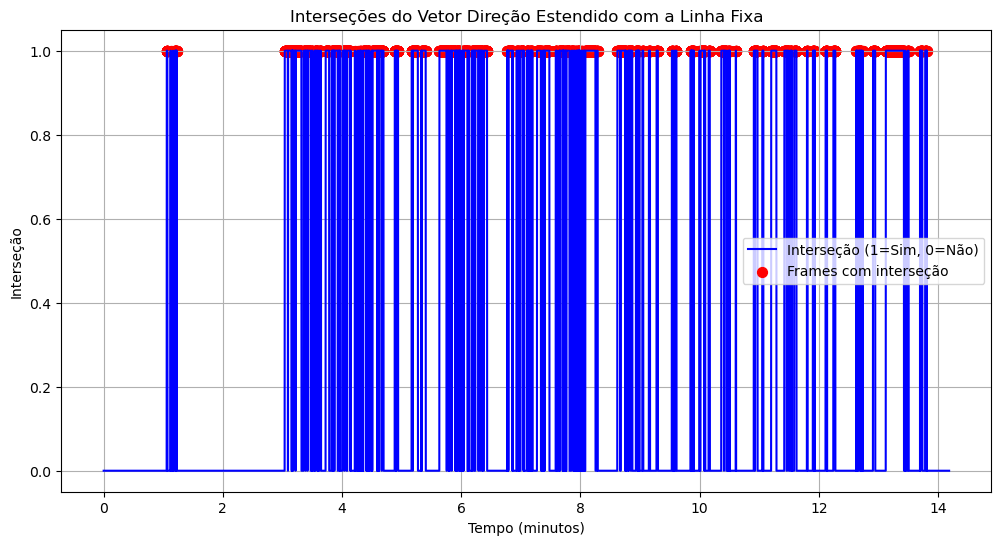

([1903,
  1904,
  1905,
  1906,
  1907,
  1908,
  1909,
  1910,
  1911,
  1912,
  1913,
  1914,
  1915,
  1916,
  1917,
  1918,
  1919,
  1920,
  1921,
  1922,
  1923,
  2021,
  2022,
  2090,
  2147,
  2148,
  2149,
  2150,
  2151,
  2152,
  2153,
  2154,
  2155,
  2156,
  2157,
  2158,
  2159,
  2160,
  2161,
  2162,
  2163,
  2164,
  2165,
  2166,
  2167,
  2168,
  2169,
  2170,
  2171,
  2172,
  2173,
  2174,
  2182,
  2183,
  2184,
  2185,
  2187,
  2188,
  2189,
  2190,
  2191,
  2193,
  2194,
  2195,
  2196,
  2197,
  2198,
  2199,
  2200,
  2201,
  2202,
  2203,
  2204,
  2205,
  5466,
  5467,
  5468,
  5469,
  5470,
  5471,
  5472,
  5473,
  5474,
  5475,
  5476,
  5477,
  5478,
  5479,
  5480,
  5481,
  5482,
  5483,
  5484,
  5485,
  5486,
  5487,
  5488,
  5489,
  5490,
  5491,
  5492,
  5493,
  5494,
  5495,
  5496,
  5497,
  5498,
  5499,
  5500,
  5501,
  5502,
  5503,
  5504,
  5505,
  5506,
  5507,
  5508,
  5509,
  5510,
  5511,
  5512,
  5513,
  5514,
  5515,
  5516,


In [24]:
count_behavior_intersections(video_path, df_segmented, x1, x2, y1, y2, scale_factor=1000)

In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


def count_behavior_intersections(video_path, df_segmented, x1, x2, y1, y2, scale_factor=1000, stim_times_path=None):
    if not os.path.exists(video_path):
        print(f"Erro: O arquivo '{video_path}' não existe.")
        return [], []

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Erro: Não foi possível abrir o vídeo '{video_path}'.")
        return [], []

    fps = cap.get(cv2.CAP_PROP_FPS)
    nose_x = df_segmented[('nose', 'x')].values
    nose_y = df_segmented[('nose', 'y')].values
    head_x = df_segmented[('head', 'x')].values
    head_y = df_segmented[('head', 'y')].values

    intersection_status = []

    def line_intersection(p1, p2, p3, p4):
        def ccw(A, B, C):
            return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])
        return ccw(p1, p3, p4) != ccw(p2, p3, p4) and ccw(p1, p2, p3) != ccw(p1, p2, p4)

    frame_idx = 0
    while cap.isOpened() and frame_idx < len(nose_x):
        ret, _ = cap.read()
        if not ret:
            break

        p1 = (head_x[frame_idx], head_y[frame_idx])
        p2 = (nose_x[frame_idx], nose_y[frame_idx])
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        norm = np.sqrt(dx**2 + dy**2)

        if norm == 0:
            intersection_status.append(0)
            frame_idx += 1
            continue

        dx_norm = dx / norm
        dy_norm = dy / norm
        p2_extended = (
            p1[0] + scale_factor * dx_norm,
            p1[1] + scale_factor * dy_norm
        )

        p3 = (x1, y1)
        p4 = (x2, y2)

        is_intersection = False
        if line_intersection(p1, p2_extended, p3, p4):
            if p1[0] != p2_extended[0]:
                t = (x1 - p1[0]) / (p2_extended[0] - p1[0])
                if 0 <= t <= 1:
                    y_intersect = p1[1] + t * (p2_extended[1] - p1[1])
                    if min(y1, y2) <= y_intersect <= max(y1, y2):
                        is_intersection = True
        intersection_status.append(1 if is_intersection else 0)
        frame_idx += 1

    cap.release()

    time_vector_sec = np.arange(len(intersection_status)) / fps
    plt.figure(figsize=(12, 6))

    # Barras translucidas para o tempo de estímulo
    if stim_times_path and os.path.exists(stim_times_path):
        stim_df = pd.read_csv(stim_times_path)
        for _, row in stim_df.iterrows():
            plt.axvspan(row['stim_ON'], row['stim_OFF'], color='slategrey', alpha=0.8)

    plt.plot(time_vector_sec, intersection_status, color='teal', alpha=0.5)
    plt.xlabel('Tempo (segundos)')
    plt.ylabel('Interseção')
    plt.title('Períodos de Interseção e Estímulo')
    plt.grid(True)
    plt.legend()
    plt.show()


In [ ]:
stim_times_path = r"D:\marmoset_project\Fidel_d31_teste_3Dsnake_eletro(rede_gabriele)\Fidel_d31_teste_3Dsnake_eletro_stim_ON_OFF_timestamps.csv"
df_stim = pd.read_csv(stim_times_path)
print(df_stim)

In [ ]:
x1 = 87
y1 = 382
x2 = 87
y2 = 154

C:\Users\gabri\AppData\Local\Temp\ipykernel_12216\1861799677.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


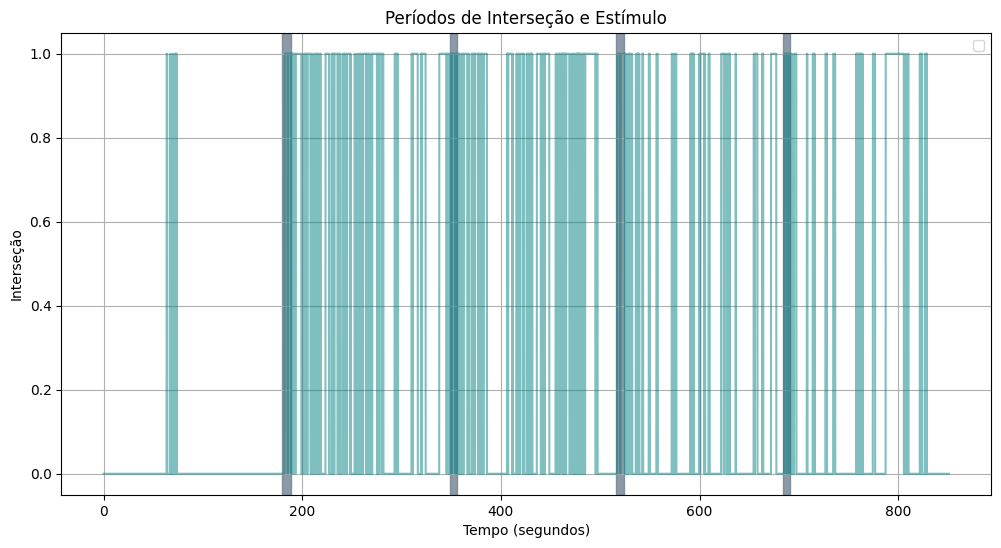

In [ ]:
count_behavior_intersections(video_path, df_segmented, x1, x2, y1, y2, stim_times_path=stim_times_path, scale_factor=1000)


In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


def count_behavior_intersections(video_path, df_segmented, x1, x2, y1, y2, scale_factor=1000, stim_times_path=None, output_video_path="output_with_lines.mp4"):
    if not os.path.exists(video_path):
        print(f"Erro: O arquivo '{video_path}' não existe.")
        return [], []

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Erro: Não foi possível abrir o vídeo '{video_path}'.")
        return [], []

    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    nose_x = df_segmented[('nose', 'x')].values
    nose_y = df_segmented[('nose', 'y')].values
    head_x = df_segmented[('head', 'x')].values
    head_y = df_segmented[('head', 'y')].values

    intersection_status = []

    def line_intersection(p1, p2, p3, p4):
        def ccw(A, B, C):
            return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])
        return ccw(p1, p3, p4) != ccw(p2, p3, p4) and ccw(p1, p2, p3) != ccw(p1, p2, p4)

    frame_idx = 0
    while cap.isOpened() and frame_idx < len(nose_x):
        ret, frame = cap.read()
        if not ret:
            break

        p1 = (int(head_x[frame_idx]), int(head_y[frame_idx]))
        p2 = (int(nose_x[frame_idx]), int(nose_y[frame_idx]))
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        norm = np.sqrt(dx**2 + dy**2)

        if norm == 0:
            intersection_status.append(0)
            frame_idx += 1
            out.write(frame)
            continue

        dx_norm = dx / norm
        dy_norm = dy / norm
        p2_extended = (
            int(p1[0] + scale_factor * dx_norm),
            int(p1[1] + scale_factor * dy_norm)
        )

        cv2.line(frame, p1, p2_extended, (0, 255, 0), 2)
        cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)

        p3 = (x1, y1)
        p4 = (x2, y2)

        is_intersection = False
        if line_intersection(p1, p2_extended, p3, p4):
            if p1[0] != p2_extended[0]:
                t = (x1 - p1[0]) / (p2_extended[0] - p1[0])
                if 0 <= t <= 1:
                    y_intersect = p1[1] + t * (p2_extended[1] - p1[1])
                    if min(y1, y2) <= y_intersect <= max(y1, y2):
                        is_intersection = True

        intersection_status.append(1 if is_intersection else 0)

        # Barra de progresso indicando interseções
        progress_bar = np.ones((10, width, 3), dtype=np.uint8) * 255  # Barra branca
        current_pos = int((frame_idx / total_frames) * width)
        if is_intersection:
            progress_bar[:, :current_pos, :] = [0, 128, 128]  # Teal
        frame[-10:, :] = progress_bar

        out.write(frame)
        frame_idx += 1

    cap.release()
    out.release()

    time_vector_sec = np.arange(len(intersection_status)) / fps
    # Barras translucidas para o tempo de estímulo
    if stim_times_path and os.path.exists(stim_times_path):
        stim_df = pd.read_csv(stim_times_path)
        for _, row in stim_df.iterrows():
            plt.axvspan(row['stim_ON'], row['stim_OFF'], color='slategrey', alpha=0.8)

    plt.plot(time_vector_sec, intersection_status, color='teal', alpha=0.5)
    plt.xlabel('Tempo (segundos)')
    plt.ylabel('Interseção')
    plt.title('Períodos de Interseção e Estímulo')
    plt.grid(True)
    plt.legend()
    plt.show()

    return prolonged_intersections, marked_frames.tolist()

C:\Users\gabri\AppData\Local\Temp\ipykernel_12216\2767940738.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


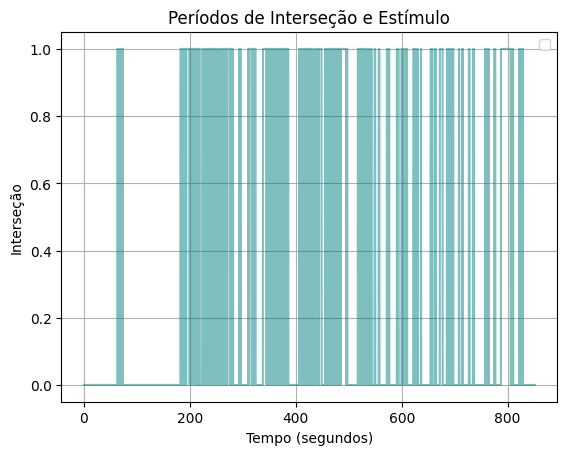

NameError: name 'prolonged_intersections' is not defined

In [ ]:
count_behavior_intersections(video_path, df_segmented, x1, x2, y1, y2, scale_factor=1000, stim_times_path=None, output_video_path="output_with_lines.mp4")